In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50,DenseNet121,Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from keras import optimizers
import pydicom
from PIL import Image
import cv2
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import applications as ap
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

2022-06-01 20:35:45.987567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/arunava/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-06-01 20:35:45.987589: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# For training data
data_path ='/home/arunava/ILD/4 Class/train/'
data_dir_list = os.listdir(data_path)

In [ ]:
img_rows=224
img_cols=224

In [ ]:
# 22 acute_interstitial_pneumonia
# 36 cryptogenic_organizing_pneumonia
# 25 Healthy images
# 81 hypersensitivity_pneumonitis images
# 16 langerhans_cell_histiocytosis images
# 23 nonspecific_interstitial_pneumonia images
# 33 pneumocystis_pneumonia images
# 112 Pulmonary_fibrosis images
# 26 sarcoidosis images
# 13 TB images

# total = 387 images

In [ ]:
labels_name={'healthy':0,'hypersensitivity_pneumonitis':1, 'pulmonary_fibrosis':2, 'tuberculosis':3}

Dieases = ['healthy','hypersensitivity pneumonitis','pulmonary_fibrosis', 'tuberculosis']

In [ ]:
img_data_list=[]
labels_list = []

In [ ]:
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset '+'{}\n'.format(dataset))
    label = labels_name[dataset]
    print(str(label)+' is the label of '+'dataset '+str(dataset))
    print()
    for img in img_list:
        file_path = data_path + '/'+ dataset + '/'+ img
        medical_image = pydicom.read_file(file_path)
        new_image = medical_image.pixel_array.astype(float)
        scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
        scaled_image = np.uint8(scaled_image)
        final_image = Image.fromarray(scaled_image)
        final_image = np.array(final_image)
        input_img_resize=cv2.resize(final_image,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        labels_list.append(label)

Loading the images of dataset healthy

0 is the label of dataset healthy

Loading the images of dataset tuberculosis

3 is the label of dataset tuberculosis

Loading the images of dataset hypersensitivity_pneumonitis

1 is the label of dataset hypersensitivity_pneumonitis

Loading the images of dataset pulmonary_fibrosis

2 is the label of dataset pulmonary_fibrosis



In [ ]:
img_data = np.array(img_data_list, dtype=object)
labels = np.array(labels_list)

In [ ]:
labels = labels.reshape(-1,)

In [ ]:
img_data.shape

(151, 224, 224)

In [ ]:
rgb_img = np.repeat(img_data[..., np.newaxis], 3, -1)
rgb_img.shape

(151, 224, 224, 3)

In [ ]:
X_none, X_train, y_none, y_train = train_test_split(rgb_img, labels, test_size=0.99, random_state=np.random.randint(1,1000, 1)[0])

In [ ]:
X_train = X_train.astype('float32')
X_train /= 255

In [ ]:
#For validation data
data_path3 ='/home/arunava/ILD/4 Class/validation/'
data_dir_list3 = os.listdir(data_path3)

In [ ]:
labels_name3={'healthy':0,'hypersensitivity_pneumonitis':1, 'pulmonary_fibrosis':2, 'tuberculosis':3}

Dieases3 = ['healthy','hypersensitivity pneumonitis','pulmonary_fibrosis', 'tuberculosis']

In [ ]:
img_data_list3=[]
labels_list3 = []

In [ ]:
for dataset3 in data_dir_list3:
    img_list3=os.listdir(data_path3+'/'+ dataset3)
    print ('Loading the images of dataset '+'{}\n'.format(dataset3))
    label3 = labels_name3[dataset3]
    print(str(label3)+' is the label of '+'dataset '+str(dataset3))
    print()
    for img3 in img_list3:
        file_path3 = data_path3 + '/'+ dataset3 + '/'+ img3
        medical_image3 = pydicom.dcmread(file_path3)
        new_image3 = medical_image3.pixel_array.astype(float)
        scaled_image3 = (np.maximum(new_image3, 0) / new_image3.max()) * 255.0
        scaled_image3 = np.uint8(scaled_image3)
        final_image3 = Image.fromarray(scaled_image3)
        final_image3 = np.array(final_image3)
        input_img_resize3=cv2.resize(final_image3,(img_rows,img_cols))
        img_data_list3.append(input_img_resize3)
        labels_list3.append(label3)

Loading the images of dataset healthy

0 is the label of dataset healthy

Loading the images of dataset tuberculosis

3 is the label of dataset tuberculosis

Loading the images of dataset hypersensitivity_pneumonitis

1 is the label of dataset hypersensitivity_pneumonitis

Loading the images of dataset pulmonary_fibrosis

2 is the label of dataset pulmonary_fibrosis



In [ ]:
img_data3 = np.array(img_data_list3, dtype=object)
labels3 = np.array(labels_list3)

In [ ]:
labels3 = labels3.reshape(-1,)

In [ ]:
rgb_img3 = np.repeat(img_data3[..., np.newaxis], 3, -1)
rgb_img3.shape

(54, 224, 224, 3)

In [ ]:
X_none3, X_val, y_none3, y_val = train_test_split(rgb_img3, labels3, test_size=0.98, random_state=np.random.randint(1,1000, 1)[0])

In [ ]:
X_val = X_val.astype('float32')
X_val /= 255
X_val.shape

(53, 224, 224, 3)

In [ ]:
import keras_tuner as kt

In [ ]:
EPOCHS = 100
BS = 4
def build_model(hp):
    bModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(img_rows, img_cols, 3)))  #base_Model
    hModel = bModel.output #head_Model
    hModel = GlobalAveragePooling2D()(hModel)
    hp_units = hp.Int('units', min_value=32, max_value=1024, step=128)
    hModel = Dense(units=hp_units, activation='relu')(hModel)
    hModel = Dropout(0.5)(hModel)
    hModel = Dense(4, activation="softmax")(hModel)
    model = Model(inputs=bModel.input, outputs=hModel)
    for layer in bModel.layers:
        layer.trainable = False
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=100, factor=3, directory='Models', project_name='With Hyper Tuner')

INFO:tensorflow:Reloading Oracle from existing project Models/With Hyper Tuner/oracle.json


2022-06-01 20:35:53.553808: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-01 20:35:53.553863: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arunava-tufgaming): /proc/driver/nvidia/version does not exist
2022-06-01 20:35:53.555802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Reloading Tuner from Models/With Hyper Tuner/tuner0.json


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
## Fitting
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [ ]:
## For checking the best parameters of this model
tuner.results_summary()

Results summary
Results in Models/With Hyper Tuner
Showing 10 best trials
Trial summary
Hyperparameters:
units: 1024
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.8301886916160583
Trial summary
Hyperparameters:
units: 896
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.8113207817077637
Trial summary
Hyperparameters:
units: 512
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.7924528121948242
Trial summary
Hyperparameters:
units: 640
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.7735849022865295
Trial summary
Hyperparameters:
units: 1024
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.7735849022865295
Trial summary
Hyperparameters:
units: 384
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/ro

In [ ]:
## For checking the best parameters of this model
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 1024 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
#bModel =VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))  #base_Model
#bModel =VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))  #base_Model
#bModel =InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))  #base_Model
#bModel =Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))  #base_Model


bModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(img_rows, img_cols, 3)))  #base_Model

hModel = bModel.output #head_Model
hModel = GlobalAveragePooling2D()(hModel)
#hModel = Flatten(name="flatten")(hModel)
hModel = Dense(1024, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(4, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [ ]:
INIT_LR = 1e-3
EPOCHS = 100
BS = 4

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS),
              metrics=["accuracy"])

In [ ]:
pat=10
early_stopping=EarlyStopping(monitor='val_loss', patience=pat)

n_folds=5
model_history = []

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    print("Compiling Starts")
    model_history.append(model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BS, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping]))
    print("======="*10, end="\n\n\n")

Training on Fold:  1
Compiling Starts
Epoch 1/100
38/38 [==============================] - 17s 340ms/step - loss: 1.5741 - accuracy: 0.5933 - val_loss: 0.4790 - val_accuracy: 0.8113
Epoch 2/100
38/38 [==============================] - 11s 284ms/step - loss: 0.5792 - accuracy: 0.7733 - val_loss: 0.7089 - val_accuracy: 0.7736
Epoch 3/100
38/38 [==============================] - 11s 283ms/step - loss: 0.3176 - accuracy: 0.8800 - val_loss: 0.4824 - val_accuracy: 0.8302
Epoch 4/100
38/38 [==============================] - 11s 284ms/step - loss: 0.2057 - accuracy: 0.9333 - val_loss: 0.4085 - val_accuracy: 0.8113
Epoch 5/100
38/38 [==============================] - 11s 289ms/step - loss: 0.1758 - accuracy: 0.9400 - val_loss: 0.2605 - val_accuracy: 0.8113
Epoch 6/100
38/38 [==============================] - 12s 314ms/step - loss: 0.0821 - accuracy: 0.9667 - val_loss: 0.2472 - val_accuracy: 0.8113
Epoch 7/100
38/38 [==============================] - 12s 330ms/step - loss: 0.1988 - accuracy: 0.9

In [ ]:
data_path2 ='/home/arunava/ILD/4 Class/test/'
data_dir_list2 = os.listdir(data_path2)

In [ ]:
labels_name2={'healthy':0,'hypersensitivity_pneumonitis':1,'pulmonary_fibrosis':2,'tuberculosis':3}

Dieases2 = ['healthy' ,'hypersensitivity pneumonitis', 'pulmonary fibrosis', 'tuberculosis']

In [ ]:
img_data_list2=[]
labels_list2 = []

In [ ]:
for dataset2 in data_dir_list2:
    img_list2=os.listdir(data_path2+'/'+ dataset2)
    print ('Loading the images of dataset '+'{}\n'.format(dataset2))
    label2 = labels_name2[dataset2]
    print(str(label2)+' is the label of '+'dataset '+str(dataset2))
    print()
    for img2 in img_list2:
        file_path2 = data_path2 + '/'+ dataset2 + '/'+ img2
        medical_image2 = pydicom.dcmread(file_path2)
        new_image2 = medical_image2.pixel_array.astype(float)
        scaled_image2 = (np.maximum(new_image2, 0) / new_image2.max()) * 255.0
        scaled_image2 = np.uint8(scaled_image2)
        final_image2 = Image.fromarray(scaled_image2)
        final_image2 = np.array(final_image2)
        input_img_resize2=cv2.resize(final_image2,(img_rows,img_cols))
        img_data_list2.append(input_img_resize2)
        labels_list2.append(label2)

Loading the images of dataset healthy

0 is the label of dataset healthy

Loading the images of dataset tuberculosis

3 is the label of dataset tuberculosis

Loading the images of dataset hypersensitivity_pneumonitis

1 is the label of dataset hypersensitivity_pneumonitis

Loading the images of dataset pulmonary_fibrosis

2 is the label of dataset pulmonary_fibrosis



In [ ]:
img_data2 = np.array(img_data_list2, dtype=object)
labels2 = np.array(labels_list2)

In [ ]:
labels2 = labels2.reshape(-1,)

In [ ]:
img_data2.shape

(30, 224, 224)

In [ ]:
rgb_img2 = np.repeat(img_data2[..., np.newaxis], 3, -1)
rgb_img2.shape

(30, 224, 224, 3)

In [ ]:
X_none2, X_test, y_none2, y_test = train_test_split(rgb_img2, labels2, test_size=0.95, random_state=np.random.randint(1,1000, 1)[0])
X_test = X_test.astype('float32')
X_test /= 255

In [ ]:
model.evaluate(X_train,y_train,batch_size=BS)

38/38 [==============================] - 8s 206ms/step - loss: 9.9723e-05 - accuracy: 1.0000


[9.972272528102621e-05, 1.0]

In [ ]:
model.evaluate(X_val,y_val,batch_size=BS)

14/14 [==============================] - 3s 198ms/step - loss: 0.2610 - accuracy: 0.8868


[0.26103875041007996, 0.8867924809455872]

In [ ]:
# Make evaluation of Test data Neural Network with batch 4
model.evaluate(X_test,y_test,batch_size=BS)

8/8 [==============================] - 2s 256ms/step - loss: 0.8765 - accuracy: 0.8276


[0.8764501214027405, 0.8275862336158752]

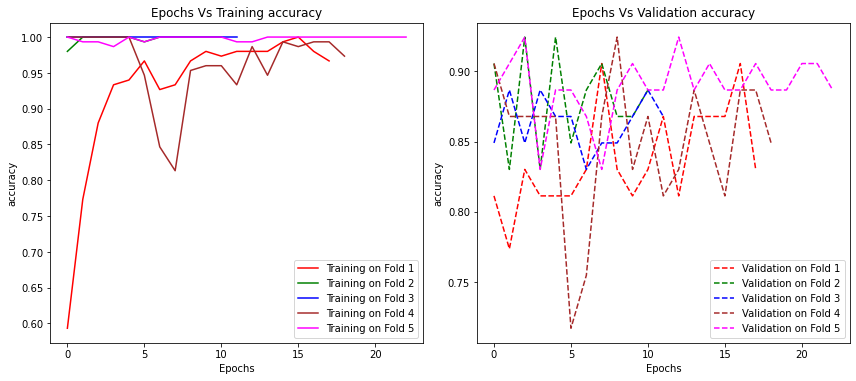

In [ ]:
# plot losses and accuracies for training and validation-G1
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(2, 2, 1)
plt.title('Epochs Vs Training accuracy')
plt.plot(model_history[0].history['accuracy'], label='Training on Fold 1', color='red')
plt.plot(model_history[1].history['accuracy'], label='Training on Fold 2', color='green')
plt.plot(model_history[2].history['accuracy'], label='Training on Fold 3', color='blue')
plt.plot(model_history[3].history['accuracy'], label='Training on Fold 4', color='brown')
plt.plot(model_history[4].history['accuracy'], label='Training on Fold 5', color='magenta')
ax.set_ylabel("accuracy")
ax.set_xlabel("Epochs")
plt.legend(loc='best')


ax = fig.add_subplot(2, 2, 2)
plt.title('Epochs Vs Validation accuracy')
plt.plot(model_history[0].history['val_accuracy'], label='Validation on Fold 1', color='red', linestyle='dashed')
plt.plot(model_history[1].history['val_accuracy'], label='Validation on Fold 2', color='green', linestyle='dashed')
plt.plot(model_history[2].history['val_accuracy'], label='Validation on Fold 3', color='blue', linestyle='dashed')
plt.plot(model_history[3].history['val_accuracy'], label='Validation on Fold 4', color='brown', linestyle='dashed')
plt.plot(model_history[4].history['val_accuracy'], label='Validation on Fold 5', color='magenta', linestyle='dashed')
ax.set_ylabel("accuracy")
ax.set_xlabel('Epochs')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# plot losses and accuracies for training and validation-G2
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(2, 2, 1)
plt.title('Epochs Vs Training Loss')
plt.plot(model_history[0].history['loss'], label='Training on Fold 1', color='red')
plt.plot(model_history[1].history['loss'], label='Training on Fold 2', color='green')
plt.plot(model_history[2].history['loss'], label='Training on Fold 3', color='blue')
plt.plot(model_history[3].history['loss'], label='Training on Fold 4', color='brown')
plt.plot(model_history[4].history['loss'], label='Training on Fold 5', color='magenta')
ax.set_ylabel('Loss')
ax.set_xlabel("Epochs")
plt.legend(loc='best')


ax = fig.add_subplot(2, 2, 2)
plt.title('Epochs Vs Validation Loss')
plt.plot(model_history[0].history['val_loss'], label='Validation on Fold 1', color='red', linestyle='dashed')
plt.plot(model_history[1].history['val_loss'], label='Validation on Fold 2', color='green', linestyle='dashed')
plt.plot(model_history[2].history['val_loss'], label='Validation on Fold 3', color='blue', linestyle='dashed')
plt.plot(model_history[3].history['val_loss'], label='Validation on Fold 4', color='brown', linestyle='dashed')
plt.plot(model_history[4].history['val_loss'], label='Validation on Fold 5', color='magenta', linestyle='dashed')
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

14/14 [==============================] - 3s 197ms/step


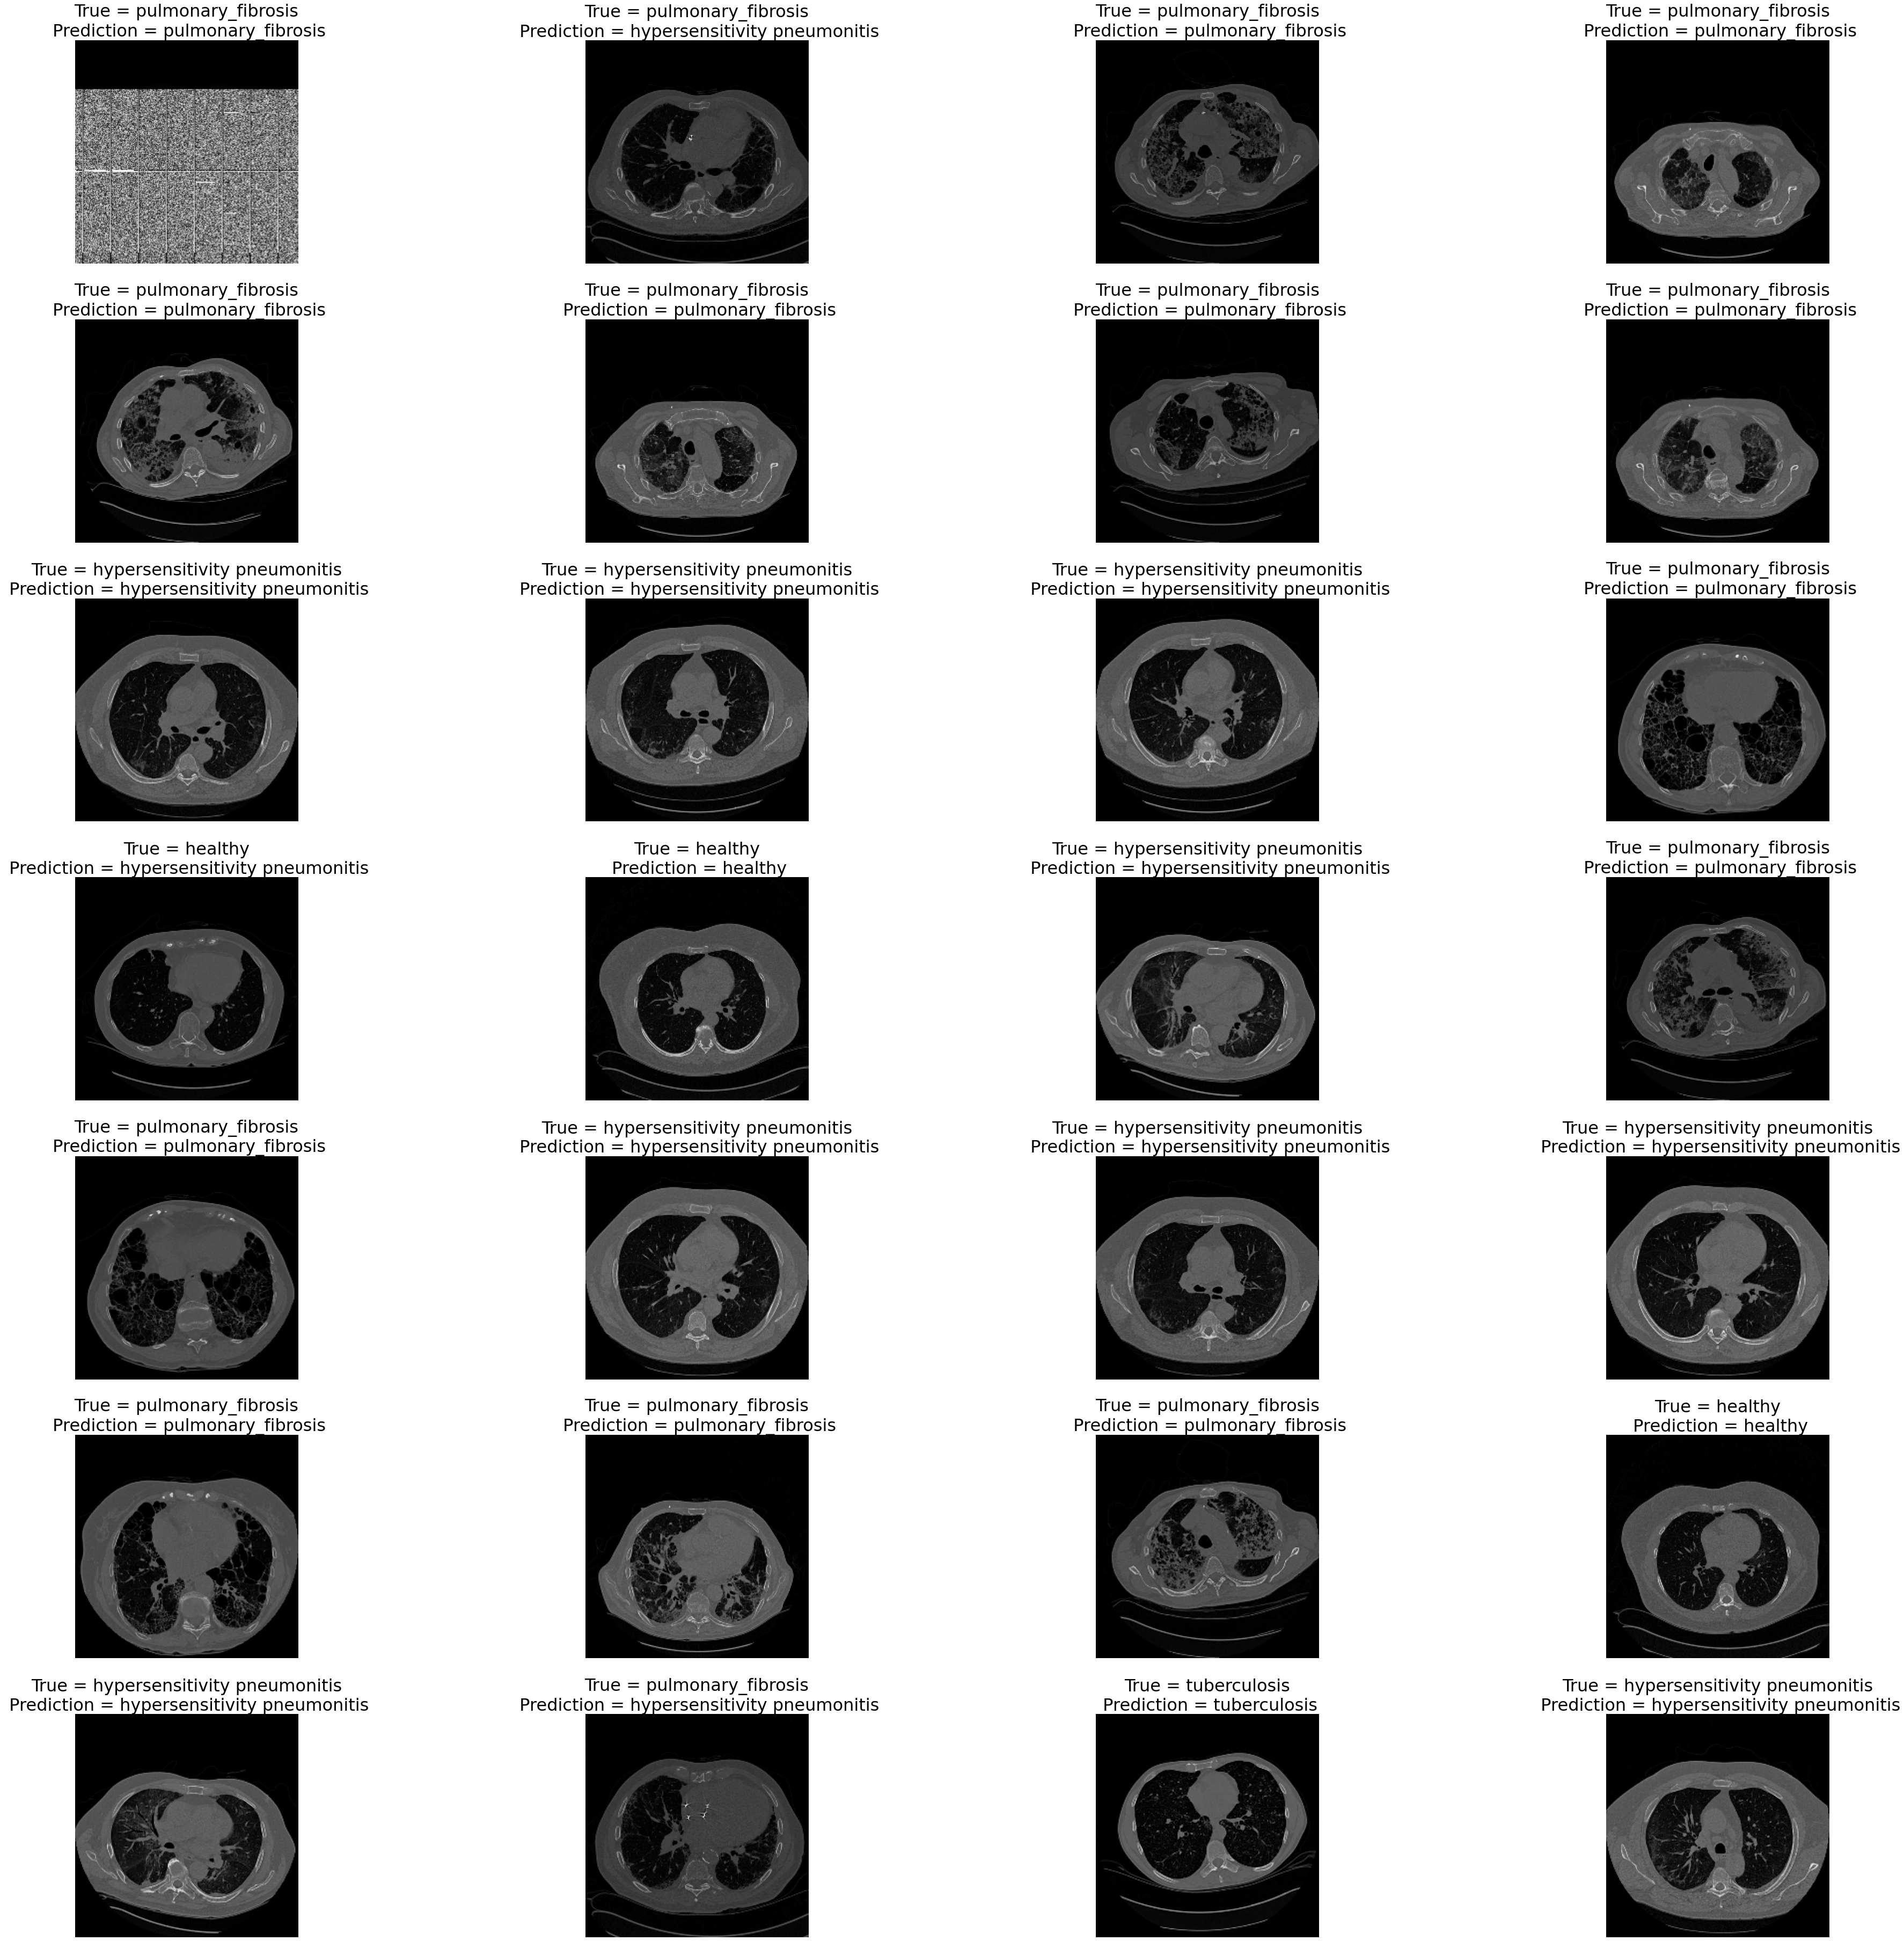

In [ ]:
# Validation Prediction Results-Grid Mode
L = 7
W = 4
fig, axes = plt.subplots(L, W, figsize = (65,65))
axes = axes.ravel()
y_val_pred = model.predict(X_val, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_val[i])
    pred = y_val_pred.argmax(axis=1)[i]
    original = y_val[i]
    axes[i].set_title('True = {}\n Prediction = {}'.format(Dieases[original], Dieases[pred]), fontsize = 32)
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.23, hspace=0.25)

8/8 [==============================] - 2s 188ms/step


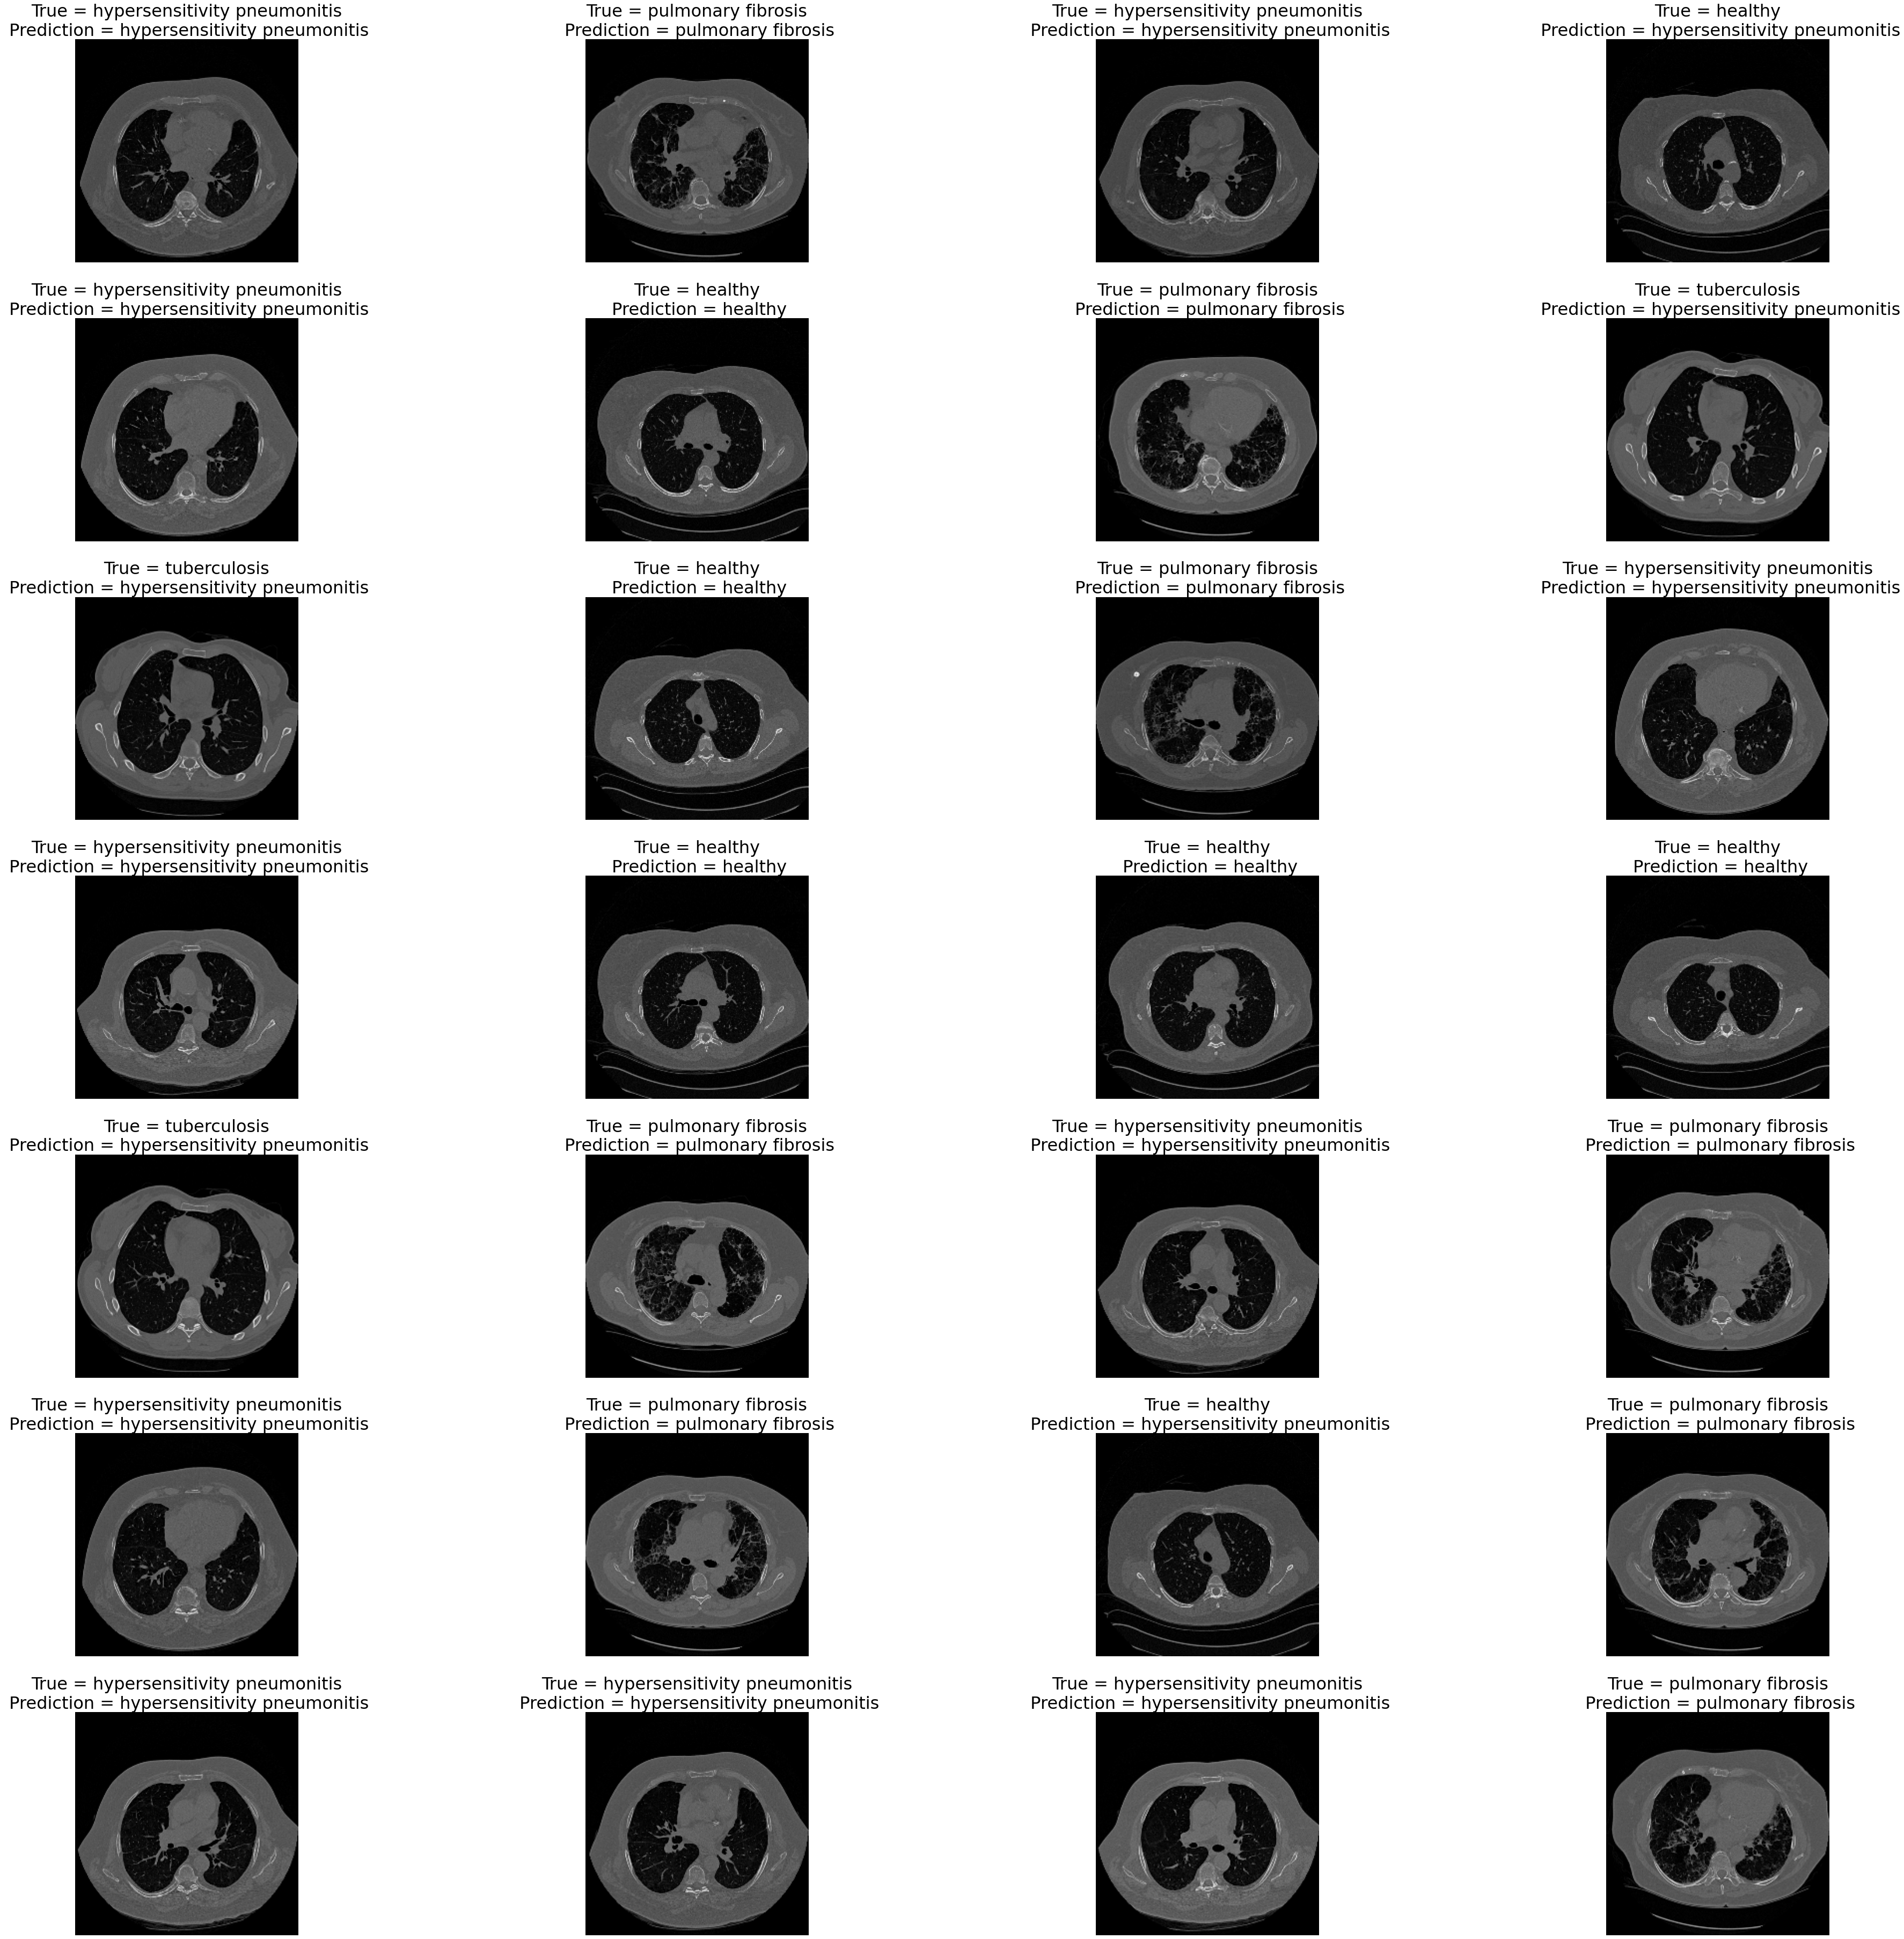

In [ ]:
# Test Prediction Prediction Results-Grid Mode
L = 7
W = 4
fig, axes = plt.subplots(L, W, figsize = (65,65))
axes = axes.ravel()
y_test_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    pred = y_test_pred.argmax(axis=1)[i]
    original = y_test[i]
    axes[i].set_title('True = {}\n Prediction = {}'.format(Dieases2[original], Dieases2[pred]), fontsize = 32)
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.23, hspace=0.25)



In [ ]:
# Test classification_report
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test, batch_size=BS)
y_test_pred = np.argmax(y_test_pred, axis=1)
print(classification_report(y_test, y_test_pred)) #target_names=LB.classes_))

8/8 [==============================] - 2s 193ms/step
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.67      1.00      0.80        10
           2       1.00      1.00      1.00         9
           3       0.00      0.00      0.00         3

    accuracy                           0.83        29
   macro avg       0.67      0.68      0.66        29
weighted avg       0.78      0.83      0.79        29



/home/arunava/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arunava/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arunava/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Test Performance Metrices
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 5  2  0  0]
 [ 0 10  0  0]
 [ 0  0  9  0]
 [ 0  3  0  0]]
acc: 0.5172
sensitivity: 0.7143
specificity: 1.0000
